In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## 1.Traitement des données
#### Question1.1

In [2]:
data=pd.read_csv('donnees_cliniques.csv')

In [3]:
data

,num_pat,age,hypertension,diabetes,anemie,sexe,fumeur,sn,suivi,DECES
0,17,1961-05-01 00:00:00,Hypertendu,Type II,Presence,Homme,Non-Fumeur,1610553662500,91,0
1,22,1946-07-17 00:00:00,Hypertendu,Type II,Presence,Homme,Fumeur,1460713243629,74,0
2,22,1944-05-07 20:50:46,Normal,NaN,Absence,Homme,NaN,2690286294911,9,0
3,103,1971-02-02 00:00:00,Normal,Absence,Presence,Homme,Non-Fumeur,1710278675554,146,0
4,161,1979-09-04 00:00:00,Normal,Type II,Presence,Femme,Non-Fumeur,2790931368848,65,1
...,...,...,...,...,...,...,...,...,...,...
344,9830,1951-09-07 00:00:00,Normal,Absence,Presence,Femme,Non-Fumeur,2510953530796,90,1
345,9923,1946-11-14 00:00:00,Hypertendu,Absence,Absence,Homme,Non-Fumeur,1461172416190,4,1
346,9959,1962-07-25 00:00:00,Hypertendu,Type II,Presence,Femme,Non-Fumeur,2620755225905,78,1
347,9972,1941-04-17 00:22:53,Normal,Absence,NaN,Homme,Fumeur,11941454972684,8,1


In [4]:
print(np.shape(data))

(349, 10)


In [5]:
print(data.columns) 

Index(['num_pat', 'age', 'hypertension', 'diabetes', 'anemie', 'sexe',
       'fumeur', 'sn', 'suivi', 'DECES'],
      dtype='object')


In [6]:
data1=pd.read_csv("donnees_biologiques.csv")

In [7]:
data1

,creatinine_phosphokinase,ejection_fraction,plaquettes,serum_creatinine,serum_sodium,num_pat
0,582,20,265000.00,1.9,130,9923
1,7861,38,263358.03,1.1,136,5715
2,146,20,162000.00,1.3,129,9146
3,111,20,210000.00,1.9,137,3101
4,160,20,327000.00,2.7,116,9566
...,...,...,...,...,...,...
294,61,38,155000.00,1.1,143,7390
295,1820,38,270000.00,1.2,139,2897
296,2060,60,742000.00,0.8,138,2169
297,2413,38,140000.00,1.4,140,4021


In [8]:
print(data1.columns)

Index(['creatinine_phosphokinase', 'ejection_fraction', 'plaquettes',
       'serum_creatinine', 'serum_sodium', 'num_pat'],
      dtype='object')


In [9]:
print(np.shape(data1))

(299, 6)


In [10]:
print(data[data["num_pat"]==17])
print(data1[data1["num_pat"]==17])

   num_pat                  age hypertension diabetes    anemie   sexe  \
0       17  1961-05-01 00:00:00   Hypertendu  Type II  Presence  Homme   

       fumeur             sn  suivi  DECES  
0  Non-Fumeur  1610553662500     91      0  
     creatinine_phosphokinase  ejection_fraction  plaquettes  \
114                       754                 40    328000.0   

     serum_creatinine  serum_sodium  num_pat  
114               1.2           126       17  


#### question 1.2

In [11]:
p=[]
for i in np.arange(len(data)):
    z=np.str(data["sn"][i])
    p.append(z)

<ipython-input-11-1c73742f8b83>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z=np.str(data["sn"][i])


In [12]:
k=[]
for i in p:
    k.append(i[0])

In [13]:
print(k[344:349])

['2', '1', '2', '1', '1']


In [14]:
print(data["sexe"][344:349])

344    Femme
345    Homme
346    Femme
347    Homme
348    Homme
Name: sexe, dtype: object


#### question 3

In [15]:
toto=pd.merge(data,data1)

## 2.Validation des données
##### question 1

In [16]:
toto.head()

,num_pat,age,hypertension,diabetes,anemie,sexe,fumeur,sn,suivi,DECES,creatinine_phosphokinase,ejection_fraction,plaquettes,serum_creatinine,serum_sodium
0,17,1961-05-01 00:00:00,Hypertendu,Type II,Presence,Homme,Non-Fumeur,1610553662500,91,0,754,40,328000.0,1.2,126
1,22,1946-07-17 00:00:00,Hypertendu,Type II,Presence,Homme,Fumeur,1460713243629,74,0,203,38,283000.0,0.6,131
2,22,1944-05-07 20:50:46,Normal,NaN,Absence,Homme,NaN,2690286294911,9,0,203,38,283000.0,0.6,131
3,103,1971-02-02 00:00:00,Normal,Absence,Presence,Homme,Non-Fumeur,1710278675554,146,0,115,20,189000.0,0.8,139
4,161,1979-09-04 00:00:00,Normal,Type II,Presence,Femme,Non-Fumeur,2790931368848,65,1,250,15,213000.0,1.3,136


In [17]:
print(data[data["num_pat"]==17]) #pour verifier que les deux tables sont biens fusionner 
print(data1[data1["num_pat"]==17])
toto[:1]

   num_pat                  age hypertension diabetes    anemie   sexe  \
0       17  1961-05-01 00:00:00   Hypertendu  Type II  Presence  Homme   

       fumeur             sn  suivi  DECES  
0  Non-Fumeur  1610553662500     91      0  
     creatinine_phosphokinase  ejection_fraction  plaquettes  \
114                       754                 40    328000.0   

     serum_creatinine  serum_sodium  num_pat  
114               1.2           126       17  


,num_pat,age,hypertension,diabetes,anemie,sexe,fumeur,sn,suivi,DECES,creatinine_phosphokinase,ejection_fraction,plaquettes,serum_creatinine,serum_sodium
0,17,1961-05-01 00:00:00,Hypertendu,Type II,Presence,Homme,Non-Fumeur,1610553662500,91,0,754,40,328000.0,1.2,126


In [19]:
print(np.shape(toto))

(312, 15)


In [20]:
np.shape(toto) #question1

(312, 15)

In [21]:
toto.describe(include='all')

,num_pat,age,hypertension,diabetes,anemie,sexe,fumeur,sn,suivi,DECES,creatinine_phosphokinase,ejection_fraction,plaquettes,serum_creatinine,serum_sodium
count,312.000000,312,312,311,312,312,311,3.120000e+02,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
unique,NaN,292,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1971-03-10 00:00:00,Normal,Absence,Absence,Homme,Non-Fumeur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,202,182,177,203,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5153.881410,NaN,NaN,NaN,NaN,NaN,NaN,1.953759e+12,129.150641,0.320513,589.839744,38.346154,262382.720449,1.411635,136.541667
std,2886.444005,NaN,NaN,NaN,NaN,NaN,NaN,5.032933e+11,77.536630,0.467423,978.891315,11.924820,96959.846169,1.061787,4.392869
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.260772e+12,4.000000,0.000000,23.000000,14.000000,25100.000000,0.500000,113.000000
25%,2764.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.560965e+12,72.000000,0.000000,115.000000,30.000000,212750.000000,0.900000,134.000000
50%,5433.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.700607e+12,114.000000,0.000000,251.500000,38.000000,262000.000000,1.100000,137.000000
75%,7696.500000,NaN,NaN,NaN,NaN,NaN,NaN,2.560670e+12,200.250000,1.000000,582.000000,45.000000,302000.000000,1.400000,139.250000


#### question 2

In [22]:
toto.describe()

,num_pat,sn,suivi,DECES,creatinine_phosphokinase,ejection_fraction,plaquettes,serum_creatinine,serum_sodium
count,312.000000,3.120000e+02,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,5153.881410,1.953759e+12,129.150641,0.320513,589.839744,38.346154,262382.720449,1.411635,136.541667
std,2886.444005,5.032933e+11,77.536630,0.467423,978.891315,11.924820,96959.846169,1.061787,4.392869
min,17.000000,1.260772e+12,4.000000,0.000000,23.000000,14.000000,25100.000000,0.500000,113.000000
25%,2764.000000,1.560965e+12,72.000000,0.000000,115.000000,30.000000,212750.000000,0.900000,134.000000
50%,5433.000000,1.700607e+12,114.000000,0.000000,251.500000,38.000000,262000.000000,1.100000,137.000000
75%,7696.500000,2.560670e+12,200.250000,1.000000,582.000000,45.000000,302000.000000,1.400000,139.250000
max,9983.000000,2.810623e+12,285.000000,1.000000,7861.000000,80.000000,850000.000000,9.400000,148.000000


In [23]:
toto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num_pat                   312 non-null    int64  
 1   age                       312 non-null    object 
 2   hypertension              312 non-null    object 
 3   diabetes                  311 non-null    object 
 4   anemie                    312 non-null    object 
 5   sexe                      312 non-null    object 
 6   fumeur                    311 non-null    object 
 7   sn                        312 non-null    int64  
 8   suivi                     312 non-null    int64  
 9   DECES                     312 non-null    int64  
 10  creatinine_phosphokinase  312 non-null    int64  
 11  ejection_fraction         312 non-null    int64  
 12  plaquettes                312 non-null    float64
 13  serum_creatinine          312 non-null    float64
 14  serum_sodi

In [25]:
print(toto["hypertension"].unique())
print(toto['diabetes'].unique())
print(toto["anemie"].unique())
print(toto["sexe"].unique())
print(toto["fumeur"].unique())


['Hypertendu' 'Normal']
['Type II' nan 'Absence']
['Presence' 'Absence']
['Homme' 'Femme']
['Non-Fumeur' 'Fumeur' nan]


#### question 3

In [28]:
toto.dropna(axis=0,inplace=True)

In [29]:
np.shape(toto) #pour verifier 

(311, 15)

In [30]:
toto.info() #pour verifier 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 311
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num_pat                   311 non-null    int64  
 1   age                       311 non-null    object 
 2   hypertension              311 non-null    object 
 3   diabetes                  311 non-null    object 
 4   anemie                    311 non-null    object 
 5   sexe                      311 non-null    object 
 6   fumeur                    311 non-null    object 
 7   sn                        311 non-null    int64  
 8   suivi                     311 non-null    int64  
 9   DECES                     311 non-null    int64  
 10  creatinine_phosphokinase  311 non-null    int64  
 11  ejection_fraction         311 non-null    int64  
 12  plaquettes                311 non-null    float64
 13  serum_creatinine          311 non-null    float64
 14  serum_sodi

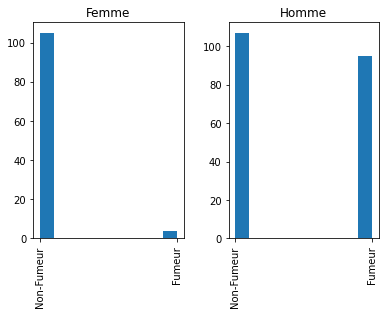

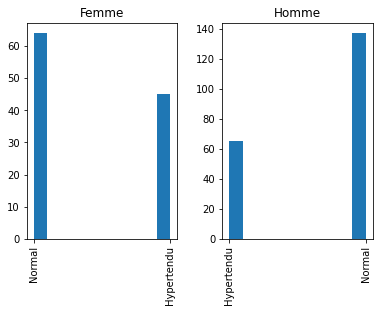

In [894]:

toto.hist(column="fumeur",by='sexe')
toto.hist(column="hypertension",by='sexe');



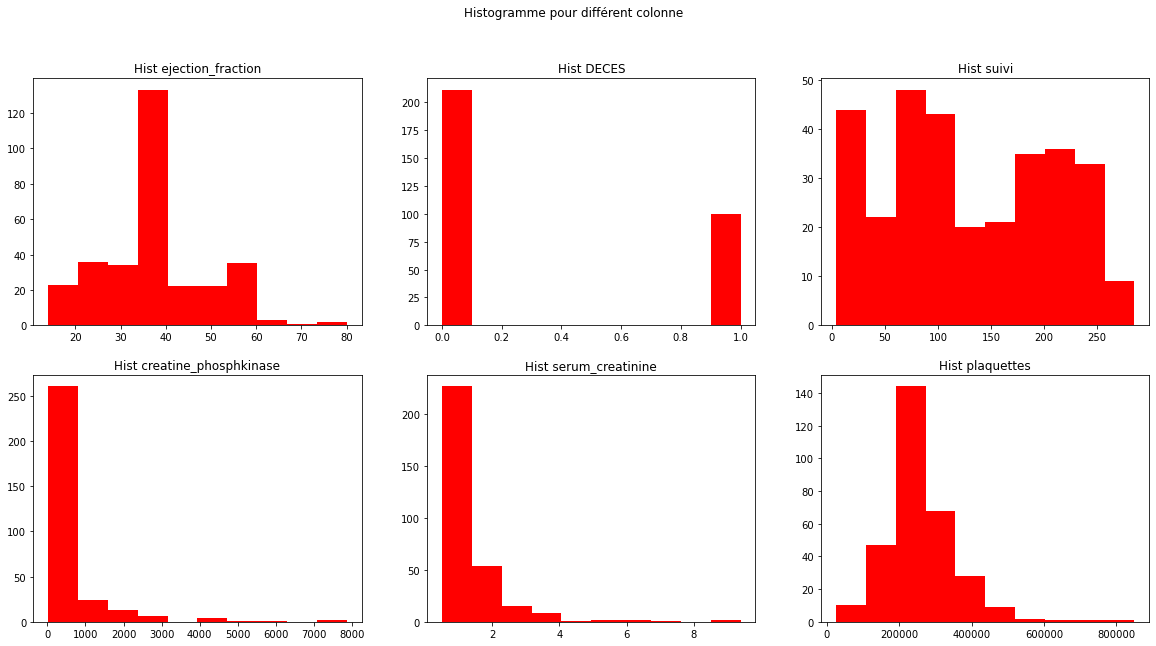

In [895]:
fig, axs = plt.subplots(2,3,figsize=(20,10))
fig.suptitle('Histogramme pour différent colonne')


axs[0,0].hist(toto.ejection_fraction,color="red")
axs[0,0].set_title("Hist ejection_fraction")
axs[0,1].hist(toto.DECES,color="red")
axs[0,1].set_title("Hist DECES")
axs[0,2].hist(toto.suivi,color="red") 
axs[0,2].set_title("Hist suivi")
axs[1,0].hist(toto.creatinine_phosphokinase,color="red") 
axs[1,0].set_title("Hist creatine_phosphkinase")
axs[1,2].hist(toto. plaquettes,color="red") 
axs[1,2].set_title("Hist plaquettes")
axs[1,1].hist(toto.serum_creatinine,color="red")
axs[1,1].set_title("Hist serum_creatinine");

 

In [896]:
toto["hypertension"].unique()

array(['Hypertendu', 'Normal'], dtype=object)

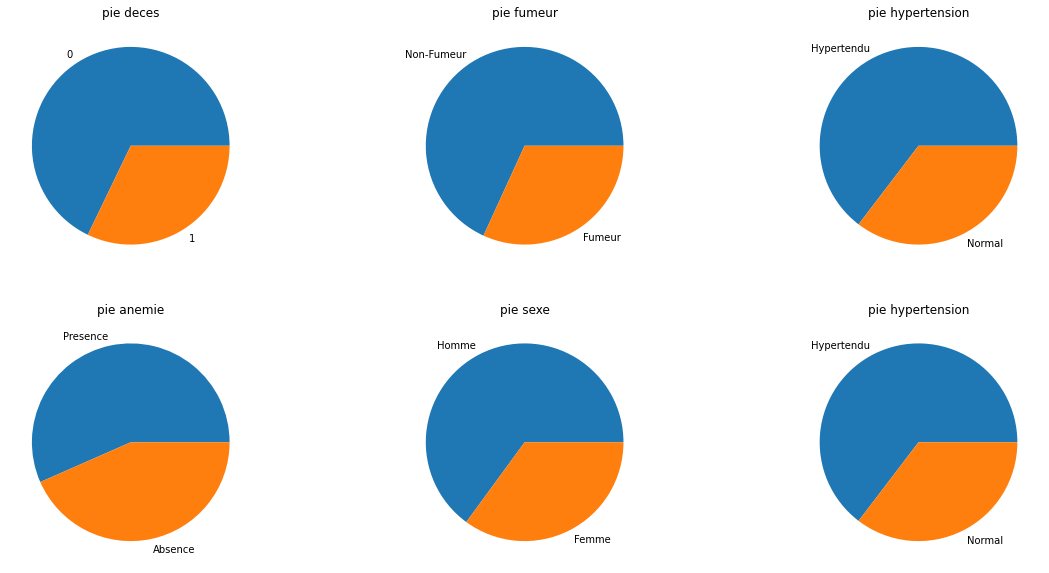

In [33]:
fig, axs = plt.subplots(2,3,figsize=(20,10))
axs[0,0].set_title('pie deces')
axs[0,0].pie(toto["DECES"].value_counts(),labels=[0,1])
axs[1,0].set_title('pie anemie')
axs[1,0].pie(toto["anemie"].value_counts(),labels=['Presence', 'Absence'])
axs[1,1].set_title('pie sexe')
axs[1,1].pie(toto["sexe"].value_counts(),labels=['Homme', 'Femme'])
axs[0,1].set_title('pie fumeur')
axs[0,1].pie(toto["fumeur"].value_counts(),labels=['Non-Fumeur', 'Fumeur'])
axs[0,2].set_title('pie hypertension')
axs[0,2].pie(toto["hypertension"].value_counts(),labels=['Hypertendu', 'Normal'])
axs[1,2].set_title('pie hypertension')
axs[1,2].pie(toto["hypertension"].value_counts(),labels=['Hypertendu', 'Normal']);

In [34]:
A=toto.corr()
A

,num_pat,sn,suivi,DECES,creatinine_phosphokinase,ejection_fraction,plaquettes,serum_creatinine,serum_sodium
num_pat,1.000000,0.064472,-0.078693,0.048751,0.072049,0.037277,0.034936,0.126152,0.010094
sn,0.064472,1.000000,0.072813,-0.063016,-0.031760,0.110026,0.124323,-0.062427,0.044374
suivi,-0.078693,0.072813,1.000000,-0.528623,-0.029460,0.039928,0.013930,-0.146471,0.098393
DECES,0.048751,-0.063016,-0.528623,1.000000,0.060719,-0.270600,-0.038064,0.288897,-0.197889
creatinine_phosphokinase,0.072049,-0.031760,-0.029460,0.060719,1.000000,-0.046641,0.020854,-0.016699,0.057964
ejection_fraction,0.037277,0.110026,0.039928,-0.270600,-0.046641,1.000000,0.056333,-0.007018,0.174440
plaquettes,0.034936,0.124323,0.013930,-0.038064,0.020854,0.056333,1.000000,-0.030450,0.057486
serum_creatinine,0.126152,-0.062427,-0.146471,0.288897,-0.016699,-0.007018,-0.030450,1.000000,-0.204281
serum_sodium,0.010094,0.044374,0.098393,-0.197889,0.057964,0.174440,0.057486,-0.204281,1.000000


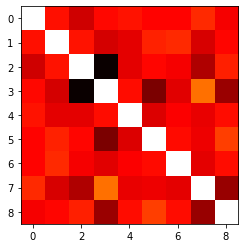

In [35]:
plt.imshow(toto.corr(),cmap='hot',interpolation='nearest');


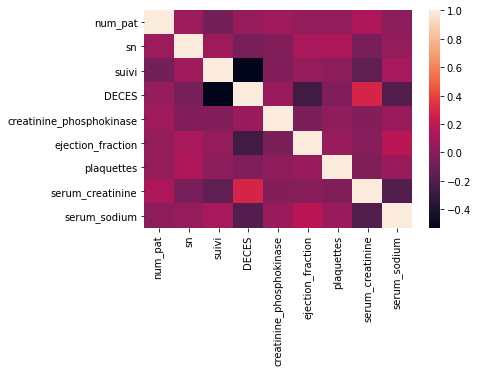

In [36]:
import seaborn as sns
sns.heatmap(A);

In [37]:
import datetime


In [38]:
toto["age"]

0      1961-05-01 00:00:00
1      1946-07-17 00:00:00
3      1971-02-02 00:00:00
4      1979-09-04 00:00:00
5      1956-03-04 00:00:00
              ...         
307    1946-01-15 00:00:00
308    1951-09-07 00:00:00
309    1946-11-14 00:00:00
310    1962-07-25 00:00:00
311    1969-04-09 00:00:00
Name: age, Length: 311, dtype: object

In [39]:
toto

,num_pat,age,hypertension,diabetes,anemie,sexe,fumeur,sn,suivi,DECES,creatinine_phosphokinase,ejection_fraction,plaquettes,serum_creatinine,serum_sodium
0,17,1961-05-01 00:00:00,Hypertendu,Type II,Presence,Homme,Non-Fumeur,1610553662500,91,0,754,40,328000.0,1.2,126
1,22,1946-07-17 00:00:00,Hypertendu,Type II,Presence,Homme,Fumeur,1460713243629,74,0,203,38,283000.0,0.6,131
3,103,1971-02-02 00:00:00,Normal,Absence,Presence,Homme,Non-Fumeur,1710278675554,146,0,115,20,189000.0,0.8,139
4,161,1979-09-04 00:00:00,Normal,Type II,Presence,Femme,Non-Fumeur,2790931368848,65,1,250,15,213000.0,1.3,136
5,166,1956-03-04 00:00:00,Normal,Type II,Presence,Femme,Non-Fumeur,2560367863828,107,0,59,60,172000.0,0.9,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,9812,1946-01-15 00:00:00,Hypertendu,Absence,Absence,Homme,Non-Fumeur,1460162470479,209,0,119,50,248000.0,1.1,148
308,9830,1951-09-07 00:00:00,Normal,Absence,Presence,Femme,Non-Fumeur,2510953530796,90,1,143,60,351000.0,1.3,137
309,9923,1946-11-14 00:00:00,Hypertendu,Absence,Absence,Homme,Non-Fumeur,1461172416190,4,1,582,20,265000.0,1.9,130
310,9959,1962-07-25 00:00:00,Hypertendu,Type II,Presence,Femme,Non-Fumeur,2620755225905,78,1,280,25,302000.0,1.0,141


In [40]:
toto

,num_pat,age,hypertension,diabetes,anemie,sexe,fumeur,sn,suivi,DECES,creatinine_phosphokinase,ejection_fraction,plaquettes,serum_creatinine,serum_sodium
0,17,1961-05-01 00:00:00,Hypertendu,Type II,Presence,Homme,Non-Fumeur,1610553662500,91,0,754,40,328000.0,1.2,126
1,22,1946-07-17 00:00:00,Hypertendu,Type II,Presence,Homme,Fumeur,1460713243629,74,0,203,38,283000.0,0.6,131
3,103,1971-02-02 00:00:00,Normal,Absence,Presence,Homme,Non-Fumeur,1710278675554,146,0,115,20,189000.0,0.8,139
4,161,1979-09-04 00:00:00,Normal,Type II,Presence,Femme,Non-Fumeur,2790931368848,65,1,250,15,213000.0,1.3,136
5,166,1956-03-04 00:00:00,Normal,Type II,Presence,Femme,Non-Fumeur,2560367863828,107,0,59,60,172000.0,0.9,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,9812,1946-01-15 00:00:00,Hypertendu,Absence,Absence,Homme,Non-Fumeur,1460162470479,209,0,119,50,248000.0,1.1,148
308,9830,1951-09-07 00:00:00,Normal,Absence,Presence,Femme,Non-Fumeur,2510953530796,90,1,143,60,351000.0,1.3,137
309,9923,1946-11-14 00:00:00,Hypertendu,Absence,Absence,Homme,Non-Fumeur,1461172416190,4,1,582,20,265000.0,1.9,130
310,9959,1962-07-25 00:00:00,Hypertendu,Type II,Presence,Femme,Non-Fumeur,2620755225905,78,1,280,25,302000.0,1.0,141


In [41]:
toto["hypertension"]=toto["hypertension"].replace(["Hypertendu","Normal"],[0,1])
toto["diabetes"]=toto["diabetes"].replace(["Type II","Absence"],[0,1])
toto["anemie"]=toto["anemie"].replace(["Presence","Absence"],[0,1])
#toto["sexe"]=toto["sexe"].replace(["Homme","Femme"],[0,1])
toto["fumeur"]=toto["fumeur"].replace(["Non-Fumeur","Fumeur"],[0,1])

In [42]:
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
toto['age'] =  pd.to_datetime(toto['age'], infer_datetime_format=True)
toto['age'] = toto['age'].apply(lambda x: from_dob_to_age(x))


## 3.Approche machine learning
### 3.1 Entrainement du modèle

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [44]:
toto=toto.drop('sn',axis=1)
y =toto["sexe"]
X = toto.drop('sexe',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
np.shape(X_train)

(248, 13)

In [46]:
np.shape(X_test)

(63, 13)

In [47]:
ranfo = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
ranfo.fit(X_train,y_train)
ranfo_predicted = ranfo.predict(X_test)
ranfo_conf_matrix = confusion_matrix(y_test, ranfo_predicted)
ranfo_acc_score = accuracy_score(y_test, ranfo_predicted)
print("confussion matrix")
print(ranfo_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",ranfo_acc_score*100,'\n')
print(classification_report(y_test,ranfo_predicted))


confussion matrix
[[ 9  7]
 [ 8 39]]


Accuracy of Random Forest: 76.19047619047619 

              precision    recall  f1-score   support

       Femme       0.53      0.56      0.55        16
       Homme       0.85      0.83      0.84        47

    accuracy                           0.76        63
   macro avg       0.69      0.70      0.69        63
weighted avg       0.77      0.76      0.76        63



In [48]:
pd.DataFrame(ranfo.feature_importances_,
              index = ['num_pat', 'age', 'hypertension', 'diabetes', 'anemie',
       'fumeur', 'suivi', 'DECES', 'creatinine_phosphokinase',
       'ejection_fraction', 'plaquettes', 'serum_creatinine', 'serum_sodium'], 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
fumeur,0.251314
num_pat,0.121271
serum_sodium,0.097826
plaquettes,0.093966
age,0.074818
suivi,0.068424
serum_creatinine,0.066951
creatinine_phosphokinase,0.065033
ejection_fraction,0.059760
diabetes,0.050128


## Bonus 

In [49]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 9  7]
 [ 7 40]]


Accuracy of Logistic Regression: 77.77777777777779 

              precision    recall  f1-score   support

       Femme       0.56      0.56      0.56        16
       Homme       0.85      0.85      0.85        47

    accuracy                           0.78        63
   macro avg       0.71      0.71      0.71        63
weighted avg       0.78      0.78      0.78        63



In [50]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[11  5]
 [16 31]]


Accuracy of K-NeighborsClassifier: 66.66666666666666 

              precision    recall  f1-score   support

       Femme       0.41      0.69      0.51        16
       Homme       0.86      0.66      0.75        47

    accuracy                           0.67        63
   macro avg       0.63      0.67      0.63        63
weighted avg       0.75      0.67      0.69        63



In [51]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[ 8  8]
 [14 33]]


Accuracy of DecisionTreeClassifier: 65.07936507936508 

              precision    recall  f1-score   support

       Femme       0.36      0.50      0.42        16
       Homme       0.80      0.70      0.75        47

    accuracy                           0.65        63
   macro avg       0.58      0.60      0.59        63
weighted avg       0.69      0.65      0.67        63



In [52]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[11  5]
 [13 34]]


Accuracy of Support Vector Classifier: 71.42857142857143 

              precision    recall  f1-score   support

       Femme       0.46      0.69      0.55        16
       Homme       0.87      0.72      0.79        47

    accuracy                           0.71        63
   macro avg       0.67      0.71      0.67        63
weighted avg       0.77      0.71      0.73        63



In [53]:
model = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    ranfo_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model

,Model,Accuracy
0,Logistic Regression,77.777778
1,Random Forest,76.190476
2,K-Nearest Neighbour,66.666667
3,Decision Tree,65.079365
4,Support Vector Machine,71.428571


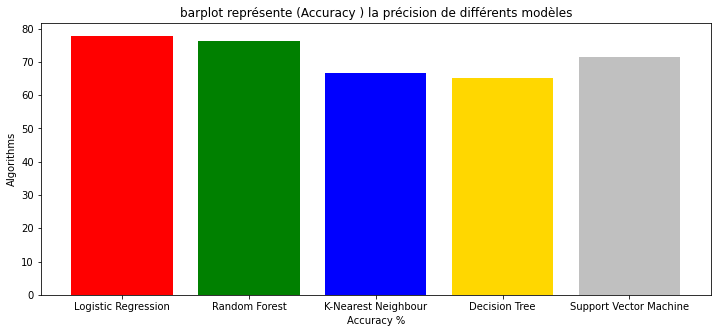

In [54]:
colors = ['red','green','blue','gold','silver']
plt.figure(figsize=(12,5))
plt.title("barplot représente (Accuracy ) la précision de différents modèles")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model['Model'],model['Accuracy'],color = colors)
plt.show()